# Project 1: Explanatory Data Analysis & Data Presentation (Movies Dataset)

# Project Brief for Self-Coders

Here you´ll have the opportunity to code major parts of Project 1 on your own. If you need any help or inspiration, have a look at the Videos or the Jupyter Notebook with the full code. <br> <br>
Keep in mind that it´s all about __getting the right results/conclusions__. It´s not about finding the identical code. Things can be coded in many different ways. Even if you come to the same conclusions, it´s very unlikely that we have the very same code. 

## Data Import and first Inspection

1. __Import__ the movies dataset from the CSV file "movies_complete.csv". __Inspect__ the data.

__Some additional information on Features/Columns__:

* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\Rajesh Doolla\AppData\Roaming\Python\Python36\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option('display.width', 1000)

In [3]:
#parsing the date
movies=pd.read_csv("movies_complete.csv",date_parser=['release_date'])

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44691 non-null  int64  
 1   title                  44691 non-null  object 
 2   tagline                20284 non-null  object 
 3   release_date           44657 non-null  object 
 4   genres                 42586 non-null  object 
 5   belongs_to_collection  4463 non-null   object 
 6   original_language      44681 non-null  object 
 7   budget_musd            8854 non-null   float64
 8   revenue_musd           7385 non-null   float64
 9   production_companies   33356 non-null  object 
 10  production_countries   38835 non-null  object 
 11  vote_count             44691 non-null  float64
 12  vote_average           42077 non-null  float64
 13  popularity             44691 non-null  float64
 14  runtime                43179 non-null  float64
 15  ov

In [5]:
movies['belongs_to_collection']

0                  Toy Story Collection
1                                   NaN
2             Grumpy Old Men Collection
3                                   NaN
4        Father of the Bride Collection
                      ...              
44686                               NaN
44687                               NaN
44688                               NaN
44689                               NaN
44690                               NaN
Name: belongs_to_collection, Length: 44691, dtype: object

In [6]:
movies_type_object=movies.select_dtypes(include='object').columns.tolist()

In [7]:
movies[movies_type_object]

,title,tagline,release_date,genres,belongs_to_collection,original_language,production_companies,production_countries,overview,spoken_languages,poster_path,cast,director
0,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,Pixar Animation Studios,United States of America,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter
1,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Joe Johnston
2,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,Warner Bros.|Lancaster Gate,United States of America,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,Howard Deutch
3,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,Twentieth Century Fox Film Corporation,United States of America,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,Forest Whitaker
4,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,Sandollar Productions|Touchstone Pictures,United States of America,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44686,Subdue,Rising and falling between a man and woman,NaN,Drama|Family,NaN,fa,NaN,Iran,Rising and falling between a man and woman.,فارسی,<img src='http://image.tmdb.org/t/p/w185//pfC8...,Leila Hatami|Kourosh Tahami|Elham Korda,Hamid Nematollah
44687,Century of Birthing,NaN,2011-11-17,Drama,NaN,tl,Sine Olivia,Philippines,An artist struggles to finish his work while a...,NaN,<img src='http://image.tmdb.org/t/p/w185//xZkm...,Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...,Lav Diaz
44688,Betrayal,A deadly game of wits.,2003-08-01,Action|Drama|Thriller,NaN,en,American World Pictures,United States of America,"When one of her hits goes wrong, a professiona...",English,<img src='http://image.tmdb.org/t/p/w185//eGga...,Erika Eleniak|Adam Baldwin|Julie du Page|James...,Mark L. Lester
44689,Satan Triumphant,NaN,1917-10-21,NaN,NaN,en,Yermoliev,Russia,"In a small town live two brothers, one a minis...",NaN,<img src='http://image.tmdb.org/t/p/w185//aorB...,Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...,Yakov Protazanov


In [8]:
for i in movies_type_object:
    print(movies[i].head(3))

0           Toy Story
1             Jumanji
2    Grumpier Old Men
Name: title, dtype: object
0                                                  NaN
1            Roll the dice and unleash the excitement!
2    Still Yelling. Still Fighting. Still Ready for...
Name: tagline, dtype: object
0    1995-10-30
1    1995-12-15
2    1995-12-22
Name: release_date, dtype: object
0     Animation|Comedy|Family
1    Adventure|Fantasy|Family
2              Romance|Comedy
Name: genres, dtype: object
0         Toy Story Collection
1                          NaN
2    Grumpy Old Men Collection
Name: belongs_to_collection, dtype: object
0    en
1    en
2    en
Name: original_language, dtype: object
0                              Pixar Animation Studios
1    TriStar Pictures|Teitler Film|Interscope Commu...
2                          Warner Bros.|Lancaster Gate
Name: production_companies, dtype: object
0    United States of America
1    United States of America
2    United States of America
Name: production_

In [9]:
movies['cast']

0        Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...
1        Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...
2        Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...
3        Whitney Houston|Angela Bassett|Loretta Devine|...
4        Steve Martin|Diane Keaton|Martin Short|Kimberl...
                               ...                        
44686              Leila Hatami|Kourosh Tahami|Elham Korda
44687    Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...
44688    Erika Eleniak|Adam Baldwin|Julie du Page|James...
44689    Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...
44690                                                  NaN
Name: cast, Length: 44691, dtype: object

In [18]:
#checking the objects types
movies.describe(include='object')

,title,tagline,release_date,genres,belongs_to_collection,original_language,production_companies,production_countries,overview,spoken_languages,poster_path,cast,director
count,44691,20284,44657,42586,4463,44681,33356,38835,43740,41094,44467,42502,43960
unique,41605,20171,17225,4044,1691,89,22537,2377,43715,1828,44456,42166,17349
top,Cinderella,Based on a true story.,2008-01-01,Drama,The Bowery Boys,en,Metro-Goldwyn-Mayer (MGM),United States of America,Adaptation of the Jane Austen novel.,English,<img src='http://image.tmdb.org/t/p/w185//qW1o...,Georges Méliès,John Ford
freq,11,7,133,4935,29,31755,741,17723,3,22189,3,24,66


In [21]:
#above one shows we have cinderalla with 11 times. lets check if its duplicate or not
movies[movies['title']=='Cinderella'].head(10)
#its not the duplicate

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
984,11224,Cinderella,The greatest love story ever told.,1950-03-04,Family|Fantasy|Animation|Romance,Cinderella Collection,en,2.9,263.591415,RKO Radio Pictures|Walt Disney Productions,...,6.8,14.436858,74.0,Cinderella has faith her dreams of a better li...,English,<img src='http://image.tmdb.org/t/p/w185//avz6...,Ilene Woods|Eleanor Audley|Lucille Bliss|Verna...,11,50,Clyde Geronimi
12988,42884,Cinderella,NaN,1997-11-02,TV Movie|Family|Fantasy|Music|Romance,NaN,en,NaN,NaN,Walt Disney Television|Citadel Entertainment|S...,...,6.1,2.102013,88.0,Updated version of the classic Rodgers and Ham...,English,<img src='http://image.tmdb.org/t/p/w185//54aw...,Brandy Norwood|Whitney Houston|Whoopi Goldberg...,5,1,Robert Iscove
23254,92349,Cinderella,NaN,1914-12-28,Fantasy|Drama,NaN,en,NaN,NaN,NaN,...,5.4,0.361288,52.0,Based on Charles Perrault's fairy tale: Cinder...,English,<img src='http://image.tmdb.org/t/p/w185//bL1K...,Mary Pickford|Owen Moore|Isabel Vernon|Georgia...,7,2,James Kirkwood
23265,105875,Cinderella,The version children love!,2002-08-06,Animation|Family|Fantasy,NaN,en,NaN,NaN,GoodTimes Entertainment,...,6.0,2.154873,48.0,"Cinderella, the beautiful and kind-hearted rag...",Afrikaans,<img src='http://image.tmdb.org/t/p/w185//rbzG...,Tony Ail|Nathan Aswell|Chera Bailey|Kathleen B...,7,3,Toshiyuki Hiruma
28073,261985,Cinderella,NaN,2011-10-30,Family|TV Movie,NaN,en,NaN,NaN,Beta Film|Lux Vide|ARD/Degeto Film GmbH|Rai Fi...,...,5.3,0.987462,180.0,Once upon a time in post-war Rome: 13-year old...,English,<img src='http://image.tmdb.org/t/p/w185//wjZK...,Vanessa Hessler|Flavio Parenti|Natalia Wörner|...,14,11,Christian Duguay
28340,150689,Cinderella,Midnight is just the beginning.,2015-03-12,Romance|Fantasy|Family|Drama,NaN,en,95.0,543.514353,Walt Disney Pictures|Genre Films|Beagle Pug Fi...,...,6.7,19.801128,105.0,"When her father unexpectedly passes away, youn...",English,<img src='http://image.tmdb.org/t/p/w185//iH4C...,Lily James|Cate Blanchett|Richard Madden|Helen...,78,80,Kenneth Branagh
33805,42651,Cinderella,NaN,1947-11-28,Comedy|Family|Fantasy,NaN,ru,NaN,NaN,Lenfilm,...,4.8,0.486073,80.0,"Based on a classic fairytale ""Cinderella"" bril...",Pусский,<img src='http://image.tmdb.org/t/p/w185//p41r...,Yanina Zhejmo|Aleksei Konsovsky|Faina Ranevska...,6,4,Nadezhda Kosheverova
35114,44459,Cinderella,NaN,1957-03-31,Drama|Romance,NaN,en,NaN,NaN,NaN,...,5.9,0.209552,77.0,The first of three TV-versions of the classic ...,English,<img src='http://image.tmdb.org/t/p/w185//cB6I...,Julie Andrews|Howard Lindsay|Howard Lindsay|Il...,9,10,Ralph Nelson
35116,289673,Cinderella,NaN,2000-01-01,NaN,NaN,en,NaN,NaN,NaN,...,5.6,1.085134,90.0,Cinderella (named Zezolla) and her family live...,English,<img src='http://image.tmdb.org/t/p/w185//gMYk...,Kathleen Turner|Katrin Cartlidge|David Warner|...,10,6,Beeban Kidron
40439,114108,Cinderella,NaN,1899-10-01,Fantasy|Horror|Science Fiction|Family,NaN,fr,NaN,NaN,Star-Film|Georges Méliès,...,5.5,1.301063,5.0,A fairy godmother magically turns Cinderella's...,No Language,<img src='http://image.tmdb.org/t/p/w185//cf0g...,Georges Méliès|Barral|Bleuette Bernon|Carmely|...,6,2,Georges Méliès


In [10]:
movies.describe()

,id,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size,crew_size
count,44691.000000,8854.000000,7385.000000,44691.000000,42077.000000,44691.000000,43179.000000,44691.000000,44691.000000
mean,107186.242845,21.669886,68.968649,111.653778,6.003341,2.957460,97.566850,12.479090,10.313643
std,111806.362236,34.359837,146.608966,495.322313,1.281060,6.040008,34.653409,12.124663,15.892154
min,2.000000,0.000001,0.000001,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,26033.500000,2.000000,2.405420,3.000000,5.300000,0.402038,86.000000,6.000000,2.000000
50%,59110.000000,8.200000,16.872671,10.000000,6.100000,1.150055,95.000000,10.000000,6.000000
75%,154251.000000,25.000000,67.642693,35.000000,6.800000,3.768882,107.000000,15.000000,12.000000
max,469172.000000,380.000000,2787.965087,14075.000000,10.000000,547.488298,1256.000000,313.000000,435.000000


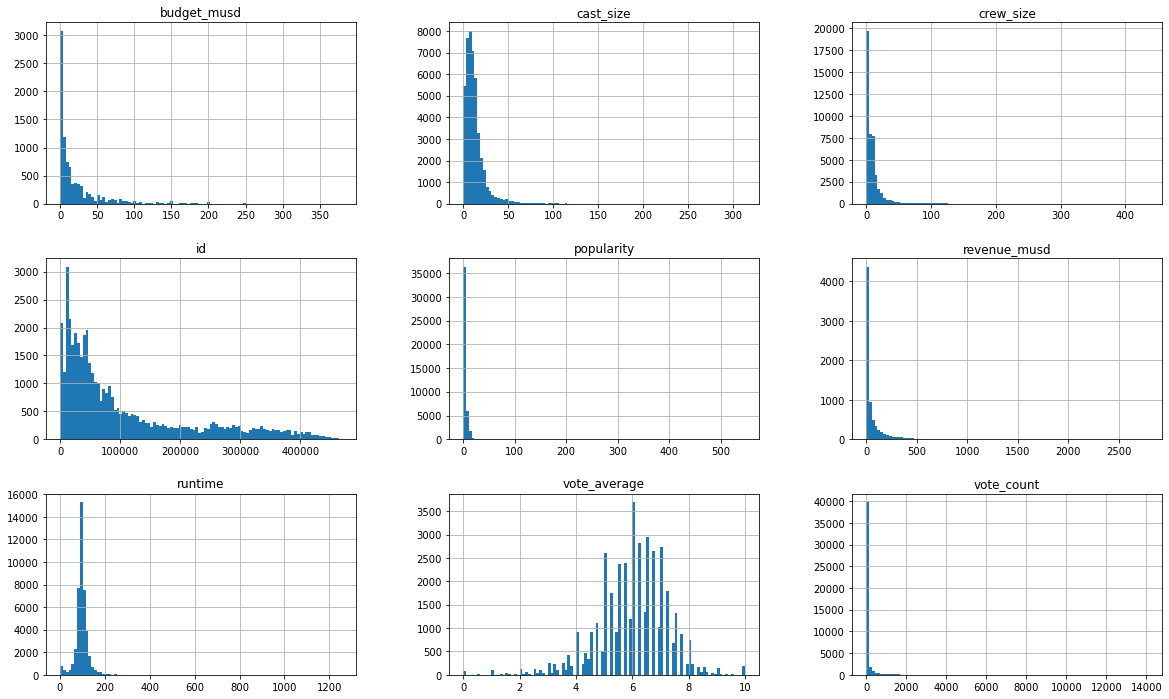

In [12]:
movies.hist(figsize=(20,12),bins=100)
plt.show()

In [17]:
#including the missing values in the method
movies.budget_musd.value_counts(dropna=True).head(20)

5.0     286
10.0    258
20.0    243
2.0     241
15.0    226
3.0     220
25.0    206
1.0     195
30.0    189
4.0     180
6.0     173
12.0    171
40.0    166
8.0     155
0.5     141
35.0    141
7.0     137
50.0    124
1.5     119
60.0    110
Name: budget_musd, dtype: int64

## The best and the worst movies...

2. __Filter__ the Dataset and __find the best/worst n Movies__ with the

- Highest Revenue
- Highest Budget
- Highest Profit (=Revenue - Budget)
- Lowest Profit (=Revenue - Budget)
- Highest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10) 
- Lowest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
- Highest number of Votes
- Highest Rating (only movies with 10 or more Ratings)
- Lowest Rating (only movies with 10 or more Ratings)
- Highest Popularity

__Define__ an appropriate __user-defined function__ to reuse code.

In [43]:
from IPython.display import HTML

In [81]:
df_best=movies[["poster_path","title","budget_musd","revenue_musd","vote_count","vote_average","popularity"]].copy()

In [82]:
df_best['Profit_musd']=movies['revenue_musd']-movies['budget_musd']
df_best['return']=movies['revenue_musd']/movies['budget_musd']

In [83]:
df_best.head()

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,Profit_musd,return
0,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Toy Story,30.0,373.554033,5415.0,7.7,21.946943,343.554033,12.451801
1,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Jumanji,65.0,262.797249,2413.0,6.9,17.015539,197.797249,4.043035
2,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Grumpier Old Men,NaN,NaN,92.0,6.5,11.712900,NaN,NaN
3,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Waiting to Exhale,16.0,81.452156,34.0,6.1,3.859495,65.452156,5.090760
4,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Father of the Bride Part II,NaN,76.578911,173.0,5.7,8.387519,NaN,NaN


In [84]:
df_best.columns=[" ","Title","Budget","Revenue","Votes","Average Rating","Popularity","Profit","ROI"]

In [53]:
df_best.set_index("Title",inplace=True)

In [54]:
df_best.head()

,,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDf...,30.0,373.554033,5415.0,7.7,21.946943,343.554033,12.451801
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpX...,65.0,262.797249,2413.0,6.9,17.015539,197.797249,4.043035
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSX...,NaN,NaN,92.0,6.5,11.712900,NaN,NaN
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjG...,16.0,81.452156,34.0,6.1,3.859495,65.452156,5.090760
Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9R...,NaN,76.578911,173.0,5.7,8.387519,NaN,NaN


In [57]:
df_best.iloc[0,0]

"<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>"

In [58]:
#checking for the HTML
subset=df_best.iloc[:5,:2]

In [59]:
subset

,,Budget
Title,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDf...,30.0
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpX...,65.0
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSX...,NaN
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjG...,16.0
Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9R...,NaN


In [63]:
subset.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th></th>\n      <th>Budget</th>\n    </tr>\n    <tr>\n      <th>Title</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Toy Story</th>\n      <td>&lt;img src=\'http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg\' style=\'height:100px;\'&gt;</td>\n      <td>30.0</td>\n    </tr>\n    <tr>\n      <th>Jumanji</th>\n      <td>&lt;img src=\'http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg\' style=\'height:100px;\'&gt;</td>\n      <td>65.0</td>\n    </tr>\n    <tr>\n      <th>Grumpier Old Men</th>\n      <td>&lt;img src=\'http://image.tmdb.org/t/p/w185//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg\' style=\'height:100px;\'&gt;</td>\n      <td>NaN</td>\n    </tr>\n    <tr>\n      <th>Waiting to Exhale</th>\n      <td>&lt;img src=\'http://image.tmdb.org/t/p/w185//4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg\' style=\'height:100px;\'&gt;</td

In [66]:
HTML(subset.to_html(escape=False))

,,Budget
Title,,
Toy Story,,30.0
Jumanji,,65.0
Grumpier Old Men,,NaN
Waiting to Exhale,,16.0
Father of the Bride Part II,,NaN


In [104]:
def best_worst(n,by,ascending=False,min_bud=0,min_votes=0):
    df2=df_best.loc[(df_best.Budget>=min_bud) & (df_best.Votes>=min_votes),[" ",by]].sort_values(by=by,ascending=ascending).head(n).copy()
    return HTML(df2.to_html(escape=False))

__Movies Top 5 - Highest Revenue__

In [37]:
movies.loc[movies.revenue_musd.sort_values(ascending=False).head().index.tolist(),'id':'release_date']

,id,title,tagline,release_date
14448,19995,Avatar,Enter the World of Pandora.,2009-12-10
26265,140607,Star Wars: The Force Awakens,Every generation has a story.,2015-12-15
1620,597,Titanic,Nothing on Earth could come between them.,1997-11-18
17669,24428,The Avengers,Some assembly required.,2012-04-25
24812,135397,Jurassic World,The park is open.,2015-06-09


In [105]:
best_worst(5,by="Revenue")

,,Revenue
14448,,2787.965087
26265,,2068.223624
1620,,1845.034188
17669,,1519.557910
24812,,1513.528810


__Movies Top 5 - Highest Budget__

In [42]:
movies.loc[movies.budget_musd.sort_values(ascending=False).head().index.tolist(),'id':'release_date']

,id,title,tagline,release_date
16986,1865,Pirates of the Caribbean: On Stranger Tides,Live Forever Or Die Trying.,2011-05-14
11743,285,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.",2007-05-19
26268,99861,Avengers: Age of Ultron,A New Age Has Come.,2015-04-22
10985,1452,Superman Returns,NaN,2006-06-28
16006,38757,Tangled,They're taking adventure to new lengths.,2010-11-24


In [106]:
best_worst(5,by="Budget",min_votes=4,min_bud=5)

,,Budget
16986,,380.0
11743,,300.0
26268,,280.0
10985,,270.0
44095,,260.0


__Movies Top 5 - Highest Profit__

In [107]:
best_worst(5,by="Profit",min_votes=4,min_bud=5)

,,Profit
14448,,2550.965087
26265,,1823.223624
1620,,1645.034188
24812,,1363.528810
28501,,1316.249360


__Movies Top 5 - Lowest Profit__

In [108]:
best_worst(5,by="Profit",min_votes=4,min_bud=5,ascending=True)

,,Profit
20959,,-165.710090
7164,,-119.180039
16659,,-111.007242
43611,,-107.447384
2684,,-98.301101


__Movies Top 5 - Highest ROI__

In [109]:
best_worst(5,by="ROI",min_votes=10,min_bud=5)

,,ROI
1055,,75.520507
5123,,73.748809
255,,70.490728
1327,,67.236286
2333,,65.640701


__Movies Top 5 - Lowest ROI__

In [110]:
best_worst(5,by="ROI",min_votes=10,min_bud=5,ascending=False)

,,ROI
1055,,75.520507
5123,,73.748809
255,,70.490728
1327,,67.236286
2333,,65.640701


__Movies Top 5 - Most Votes__

In [111]:
best_worst(5,by="Votes",min_bud=5)

,,Votes
15368,,14075.0
12396,,12269.0
14448,,12114.0
17669,,12000.0
26272,,11444.0


__Movies Top 5 - Highest Rating__

In [113]:
df_best.columns

Index([' ', 'Title', 'Budget', 'Revenue', 'Votes', 'Average Rating', 'Popularity', 'Profit', 'ROI'], dtype='object')

In [115]:
best_worst(5,by="Average Rating",min_votes=10,min_bud=5)

,,Average Rating
10233,,9.1
32987,,8.6
826,,8.5
313,,8.5
2816,,8.3


__Movies Top 5 - Lowest Rating__

In [116]:
best_worst(5,by="Average Rating",min_votes=10,min_bud=5,ascending=True)

,,Average Rating
25451,,2.3
35387,,2.6
12201,,2.7
6665,,2.8
30369,,2.9


__Movies Top 5 - Most Popular__

In [117]:
best_worst(5,by="Popularity",min_votes=10,min_bud=5)

,,Popularity
30330,,547.488298
32927,,294.337037
41556,,287.253654
42940,,228.032744
24187,,213.849907


## Find your next Movie

3. __Filter__ the Dataset for movies that meet the following conditions:

__Search 1: Science Fiction Action Movie with Bruce Willis (sorted from high to low Rating)__

__Search 2: Movies with Uma Thurman and directed by Quentin Tarantino (sorted from short to long runtime)__

__Search 3: Most Successful Pixar Studio Movies between 2010 and 2015 (sorted from high to low Revenue)__

__Search 4: Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent movies first)__

In [127]:
movies.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres', 'belongs_to_collection', 'original_language', 'budget_musd', 'revenue_musd', 'production_companies', 'production_countries', 'vote_count', 'vote_average', 'popularity', 'runtime', 'overview', 'spoken_languages', 'poster_path', 'cast', 'cast_size', 'crew_size', 'director'], dtype='object')

__Search 1: Science Fiction Action Movie with Bruce Willis (sorted from high to low Rating)__

In [131]:
movies.loc[(movies.genres.str.contains("Action")) & (movies.cast.str.contains("Bruce")),["title","vote_average"]].\
sort_values(by="vote_average",ascending=False)\
.head(5)

,title,vote_average
39083,The Dragon Lives Again,10.0
44431,First Round Down,10.0
12396,The Dark Knight,8.3
1144,The Empire Strikes Back,8.2
5767,The Lord of the Rings: The Two Towers,8.0


__Search 2: Movies with Uma Thurman and directed by Quentin Tarantino (sorted from short to long runtime)__

In [138]:
movies.loc[(movies.cast.str.contains("Uma Thurman")) & (movies.director.str.contains("Quentin")),["title","cast","director","runtime"]]\
.sort_values(by="runtime",ascending=False).\
head(10)

,title,cast,director,runtime
291,Pulp Fiction,John Travolta|Samuel L. Jackson|Uma Thurman|Br...,Quentin Tarantino,154.0
7208,Kill Bill: Vol. 2,Uma Thurman|David Carradine|Daryl Hannah|Micha...,Quentin Tarantino,136.0
6667,Kill Bill: Vol. 1,Uma Thurman|Lucy Liu|Vivica A. Fox|Daryl Hanna...,Quentin Tarantino,111.0


__Search 3: Most Successful Pixar Studio Movies between 2010 and 2015 (sorted from high to low Revenue)__

In [148]:
movies.loc[(movies.release_date.between("2010-01-01","2015-12-31")) & (movies.production_companies.str.contains("Pixar")),["title","production_companies","revenue_musd"]].\
sort_values(by="revenue_musd",ascending=False).head(5)

,title,production_companies,revenue_musd
15236,Toy Story 3,Walt Disney Pictures|Pixar Animation Studios,1066.969703
29957,Inside Out,Walt Disney Pictures|Pixar Animation Studios,857.611174
20888,Monsters University,Walt Disney Pictures|Pixar Animation Studios,743.559607
17220,Cars 2,Walt Disney Pictures|Pixar Animation Studios,559.852396
18900,Brave,Walt Disney Pictures|Pixar Animation Studios,538.983207


__Search 4: Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent movies first)__

In [155]:
movies.loc[(movies.genres.str.contains("Action")) |  (movies.genres.str.contains("Thriller"))& (movies.original_language.str.contains("en")) & (movies.vote_average>=7.5),\
           ["title","release_date","genres","original_language"]]\
.sort_values(by="release_date",ascending=False).head(10)

,title,release_date,genres,original_language
44256,The Dark Tower,2017-08-03,Action|Western|Science Fiction|Fantasy|Horror,en
44400,Wind River,2017-08-03,Action|Crime|Mystery|Thriller,en
44417,S.W.A.T.: Under Siege,2017-08-01,Action|Crime|Thriller,en
44643,Cop and a Half: New Recruit,2017-08-01,Crime|Comedy|Action|Family,en
43894,Tokyo Ghoul,2017-07-29,Action|Drama|Horror|Thriller,ja
43897,Atomic Blonde,2017-07-26,Action|Thriller,en
44484,First Kill,2017-07-21,Action|Thriller,en
44490,Descendants 2,2017-07-21,TV Movie|Family|Action|Comedy|Music|Adventure,en
43611,Valerian and the City of a Thousand Planets,2017-07-20,Adventure|Science Fiction|Action,en
43941,Dunkirk,2017-07-19,Action|Drama|History|Thriller|War,en


## Are Franchises more successful?

4. __Analyze__ the Dataset and __find out whether Franchises (Movies that belong to a collection) are more successful than stand-alone movies__ in terms of:

- mean revenue
- median Return on Investment
- mean budget raised
- mean popularity
- mean rating

hint: use groupby()

__Franchise vs. Stand-alone: Average Revenue__

In [179]:
movies.belongs_to_collection.notna().sample(5)

37095    False
34196    False
26784    False
26505     True
16132    False
Name: belongs_to_collection, dtype: bool

In [181]:
movies["Franchise"]=movies.belongs_to_collection.notna()

In [182]:
movies["Franchise"].value_counts()

False    40228
True      4463
Name: Franchise, dtype: int64

In [185]:
movies.groupby("Franchise").revenue_musd.mean()

Franchise
False     44.742814
True     165.708193
Name: revenue_musd, dtype: float64

__Franchise vs. Stand-alone: Return on Investment / Profitability (median)__

In [186]:
movies["ROI"]=movies["revenue_musd"].div(movies.budget_musd)

In [188]:
movies.groupby("Franchise").ROI.mean()

Franchise
False    6966.390650
True      856.404622
Name: ROI, dtype: float64

__Franchise vs. Stand-alone: Average Budget__

In [189]:
movies.groupby("Franchise").budget_musd.mean()

Franchise
False    18.047741
True     38.319847
Name: budget_musd, dtype: float64

__Franchise vs. Stand-alone: Average Popularity__

In [190]:
movies.groupby("Franchise").popularity.mean()

Franchise
False    2.592726
True     6.245051
Name: popularity, dtype: float64

__Franchise vs. Stand-alone: Average Rating__

In [193]:
movies.groupby("Franchise").vote_average.mean()

Franchise
False    6.008787
True     5.956806
Name: vote_average, dtype: float64

#### ALL Aggregations into a single dataFrame

In [202]:
movies.groupby("Franchise").agg({"budget_musd":"mean","revenue_musd":"mean","vote_average":"mean","popularity":"mean",\
                                 "ROI":"median","vote_count":"mean"})

,budget_musd,revenue_musd,vote_average,popularity,ROI,vote_count
Franchise,,,,,,
False,18.047741,44.742814,6.008787,2.592726,1.619699,78.289550
True,38.319847,165.708193,5.956806,6.245051,3.709195,412.387856


## Most Successful Franchises

5. __Find__ the __most successful Franchises__ in terms of

- __total number of movies__
- __total & mean budget__
- __total & mean revenue__
- __mean rating__

In [205]:
pd.options.display.float_format = "{:,.2f}".format

In [215]:
franchise=movies.groupby("belongs_to_collection").agg({"title":"count","budget_musd":["sum","count"],"revenue_musd":["sum","count"],\
                                 "vote_average":["mean"],"popularity":"mean","ROI":"median","vote_count":"mean"})

In [217]:
franchise.nlargest(10,('title','count'))

title budget_musd       revenue_musd       vote_average popularity    ROI vote_count
                                       count         sum count          sum count         mean       mean median       mean
belongs_to_collection                                                                                                      
The Bowery Boys                           29        0.00     0         0.00     0         6.67       0.20    nan       0.72
Totò Collection                           27        0.00     0         0.00     0         6.84       1.05    nan      18.04
James Bond Collection                     26    1,539.65    26     7,106.97    26         6.34      13.45   6.13   1,284.31
Zatôichi: The Blind Swordsman             26        0.00     0         0.00     0         6.40       1.10    nan      11.19
The Carry On Collection                   25        0.00     0         0.00     0         6.17       3.22    nan      21.04
Charlie Chan (Sidney Toler) Collection    21        0.00     0         0.00     0         6.61       0.63    nan       5.81
Pokémon Collection                        20      250.72     5       601.87     9         6.06       4.37   4.46      71.10
Godzilla (Showa) Collection               16        2.81     5         0.00     0         5.98       3.42    nan      39.75
Charlie Chan (Warner Oland) Collection    15        0.00     0         0.00     0         6.66       0.66    nan       6.87
Dragon Ball Z (Movie) Collection          15        5.00     1       112.12     2         6.61       6.18  12.35     133.33

In [219]:
franchise.nlargest(10,('budget_musd','count'))

title budget_musd       revenue_musd       vote_average popularity    ROI vote_count
                                     count         sum count          sum count         mean       mean median       mean
belongs_to_collection                                                                                                    
James Bond Collection                   26    1,539.65    26     7,106.97    26         6.34      13.45   6.13   1,284.31
Friday the 13th Collection              12       84.40    12       464.90    12         5.42       9.76   6.67     326.58
Hellraiser Collection                   10       27.35     9        55.86     4         4.99       6.35   4.10     133.30
A Nightmare on Elm Street Collection     8       84.80     8       363.59     8         5.96       9.98   6.13     478.50
Halloween Collection                     8       50.30     8       247.17     8         5.65       8.99   3.40     347.00
Harry Potter Collection                  8    1,280.00     8     7,707.37     8         7.54      26.25   6.17   5,983.25
Star Wars Collection                     8      854.35     8     7,434.49     8         7.37      23.41   8.24   5,430.38
The Fast and the Furious Collection      8    1,009.00     8     5,125.10     8         6.66      10.80   4.94   3,197.00
Rocky Collection                         7      159.00     7     1,337.13     7         6.67      15.38   9.69   1,168.29
Saw Collection                           7       67.00     7       878.31     7         6.19      15.75  13.94   1,135.14

In [221]:
franchise.nlargest(10,('revenue_musd','sum'))

title budget_musd       revenue_musd       vote_average popularity    ROI vote_count
                                    count         sum count          sum count         mean       mean median       mean
belongs_to_collection                                                                                                   
Harry Potter Collection                 8    1,280.00     8     7,707.37     8         7.54      26.25   6.17   5,983.25
Star Wars Collection                    8      854.35     8     7,434.49     8         7.37      23.41   8.24   5,430.38
James Bond Collection                  26    1,539.65    26     7,106.97    26         6.34      13.45   6.13   1,284.31
The Fast and the Furious Collection     8    1,009.00     8     5,125.10     8         6.66      10.80   4.94   3,197.00
Pirates of the Caribbean Collection     5    1,250.00     5     4,521.58     5         6.88      53.97   3.45   5,016.00
Transformers Collection                 5      965.00     5     4,366.10     5         6.14      14.43   5.20   3,046.40
Despicable Me Collection                6      299.00     4     3,691.07     4         6.78     106.72  12.76   3,041.33
The Twilight Collection                 5      385.00     5     3,342.11     5         5.84      29.50  10.27   2,770.20
Ice Age Collection                      5      429.00     5     3,216.71     5         6.38      16.08   8.26   2,643.80
Jurassic Park Collection                4      379.00     4     3,031.48     4         6.50      10.77   7.03   4,608.75

In [222]:
franchise.nlargest(10,('popularity','mean'))

title budget_musd       revenue_musd       vote_average popularity    ROI vote_count
                                       count         sum count          sum count         mean       mean median       mean
belongs_to_collection                                                                                                      
Wonder Woman Collection                    1      149.00     1       820.58     1         7.20     294.34   5.51   5,025.00
Deadpool Collection                        1       58.00     1       783.11     1         7.40     187.86  13.50  11,444.00
Avatar Collection                          1      237.00     1     2,787.97     1         7.20     185.07  11.76  12,114.00
Guardians of the Galaxy Collection         2      370.00     2     1,636.74     2         7.75     119.31   4.43   7,436.00
John Wick Collection                       2       60.00     2       260.30     2         6.85     116.56   4.36   4,211.50
Despicable Me Collection                   6      299.00     4     3,691.07     4         6.78     106.72  12.76   3,041.33
Blade Runner Collection                    1       28.00     1        33.14     1         7.90      96.27   1.18   3,833.00
Planet of the Apes (Reboot) Collection     3      415.00     3     1,563.41     3         7.00      87.72   4.18   3,546.00
The Avengers Collection                    2      500.00     2     2,924.96     2         7.35      63.63   5.96   9,454.00
Captain America Collection                 3      560.00     3     2,238.64     3         7.10      61.31   4.20   6,839.00

## Most Successful Directors

6. __Find__ the __most successful Directors__ in terms of

- __total number of movies__
- __total revenue__
- __mean rating__

In [224]:
movies.director.value_counts(dropna=False)

NaN                  731
John Ford             66
Michael Curtiz        65
Werner Herzog         54
Alfred Hitchcock      53
                    ... 
Lauren Himmel          1
Chad Lowe              1
Dana Doron             1
Valerie McCaffrey      1
Lydia B. Smith         1
Name: director, Length: 17350, dtype: int64

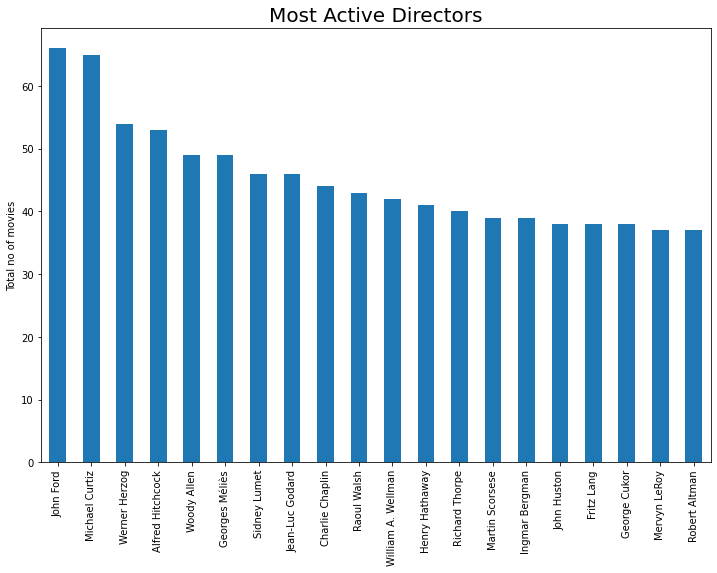

In [231]:
plt.figure(figsize=(12,8))
movies.director.value_counts().head(20).plot(kind='bar')
plt.title("Most Active Directors",fontsize=20)
plt.ylabel("Total no of movies")
plt.show()

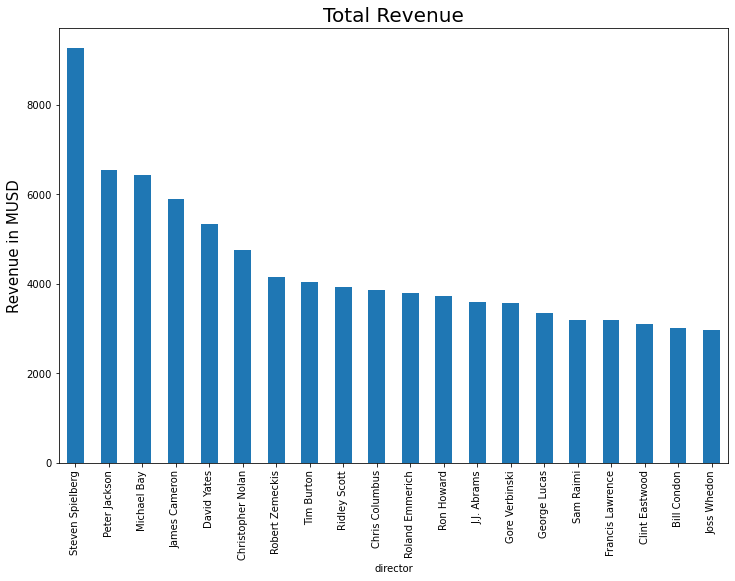

In [235]:
plt.figure(figsize=(12,8))
movies.groupby("director").revenue_musd.sum().nlargest(20).plot(kind="bar")
plt.title("Total Revenue",fontsize=20)
plt.ylabel("Revenue in MUSD",fontsize=15)
plt.show()

In [238]:
director_df=movies.groupby("director").agg({"title":"count","vote_average":"mean","vote_count":"mean"})

In [240]:
director_df

,title,vote_average,vote_count
director,,,
Dale Trevillion\t,2,4.00,2.00
Davide Manuli,1,6.90,10.00
E.W. Swackhamer,1,5.90,5.00
Vitaliy Vorobyov,1,5.50,3.00
Yeon Sang-Ho,4,6.60,259.75
...,...,...,...
Ярополк Лапшин,1,10.00,1.00
پیمان معادی,1,6.00,2.00
塩谷 直義,1,7.20,40.00


In [241]:
director_df.loc[(director_df.vote_count>=1000)&(director_df.title>=10)].nlargest(10,("vote_average"))

,title,vote_average,vote_count
director,,,
Hayao Miyazaki,14,7.70,"1,050.00"
Christopher Nolan,11,7.62,"6,122.18"
Quentin Tarantino,10,7.49,"4,591.00"
Wes Anderson,10,7.37,"1,174.30"
David Fincher,10,7.35,"3,758.80"
Peter Jackson,13,7.14,"3,659.31"
Joel Coen,17,7.02,"1,067.00"
James Cameron,11,6.93,"3,066.91"
Stanley Kubrick,16,6.91,"1,138.38"


In [245]:
movies.genres=movies.genres.astype(str)

#note when ever you have datatype in object and contains nan, we should first convert all the values to string. 

In [250]:
movies.loc[movies.genres.str.contains("Horror")].groupby("director").revenue_musd.sum().nlargest(20)

director
Paul W.S. Anderson    982.29
James Wan             861.31
Wes Craven            834.93
Francis Lawrence      816.23
Ridley Scott          689.00
Marc Forster          531.87
Steven Spielberg      500.10
William Friedkin      466.40
Darren Lynn Bousman   456.34
M. Night Shyamalan    375.37
Henry Joost           349.07
David R. Ellis        348.74
Adrian Lyne           346.11
James DeMonaco        316.70
Stephen Sommers       311.46
Gore Verbinski        275.91
Guillermo del Toro    261.63
John R. Leonetti      255.27
Fede Alvarez          254.64
Jordan Peele          252.43
Name: revenue_musd, dtype: float64

## Most Successful Actors

In [251]:
movies.cast

0        Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...
1        Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...
2        Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...
3        Whitney Houston|Angela Bassett|Loretta Devine|...
4        Steve Martin|Diane Keaton|Martin Short|Kimberl...
                               ...                        
44686              Leila Hatami|Kourosh Tahami|Elham Korda
44687    Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...
44688    Erika Eleniak|Adam Baldwin|Julie du Page|James...
44689    Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...
44690                                                  NaN
Name: cast, Length: 44691, dtype: object

In [253]:
movies.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director,Franchise,ROI
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,...,81.00,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter,True,12.45
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Commu...,...,104.00,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston,False,4.04
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,nan,nan,Warner Bros.|Lancaster Gate,...,101.00,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch,True,nan
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.00,81.45,Twentieth Century Fox Film Corporation,...,127.00,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker,False,5.09
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,nan,76.58,Sandollar Productions|Touchstone Pictures,...,106.00,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer,True,nan


In [254]:
movies.set_index("id")

,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,...,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director,Franchise,ROI
id,,,,,,,,,,,,,,,,,,,,,
862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,...,81.00,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter,True,12.45
8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,...,104.00,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston,False,4.04
15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,nan,nan,Warner Bros.|Lancaster Gate,United States of America,...,101.00,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch,True,nan
31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.00,81.45,Twentieth Century Fox Film Corporation,United States of America,...,127.00,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker,False,5.09
11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,nan,76.58,Sandollar Productions|Touchstone Pictures,United States of America,...,106.00,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer,True,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439050,Subdue,Rising and falling between a man and woman,NaN,Drama|Family,NaN,fa,nan,nan,NaN,Iran,...,90.00,Rising and falling between a man and woman.,فارسی,<img src='http://image.tmdb.org/t/p/w185//pfC8...,Leila Hatami|Kourosh Tahami|Elham Korda,3,9,Hamid Nematollah,False,nan
111109,Century of Birthing,NaN,2011-11-17,Drama,NaN,tl,nan,nan,Sine Olivia,Philippines,...,360.00,An artist struggles to finish his work while a...,NaN,<img src='http://image.tmdb.org/t/p/w185//xZkm...,Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...,11,6,Lav Diaz,False,nan
67758,Betrayal,A deadly game of wits.,2003-08-01,Action|Drama|Thriller,NaN,en,nan,nan,American World Pictures,United States of America,...,90.00,"When one of her hits goes wrong, a professiona...",English,<img src='http://image.tmdb.org/t/p/w185//eGga...,Erika Eleniak|Adam Baldwin|Julie du Page|James...,15,5,Mark L. Lester,False,nan


In [257]:
actor=movies.cast.str.split("|",expand=True)

In [258]:
actor.head(10)

,0,1,2,3,4,5,6,7,8,9,...,303,304,305,306,307,308,309,310,311,312
0,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wallace Shawn,John Ratzenberger,Annie Potts,John Morris,Erik von Detten,Laurie Metcalf,...,None,None,None,None,None,None,None,None,None,None
1,Robin Williams,Jonathan Hyde,Kirsten Dunst,Bradley Pierce,Bonnie Hunt,Bebe Neuwirth,David Alan Grier,Patricia Clarkson,Adam Hann-Byrd,Laura Bell Bundy,...,None,None,None,None,None,None,None,None,None,None
2,Walter Matthau,Jack Lemmon,Ann-Margret,Sophia Loren,Daryl Hannah,Burgess Meredith,Kevin Pollak,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Whitney Houston,Angela Bassett,Loretta Devine,Lela Rochon,Gregory Hines,Dennis Haysbert,Michael Beach,Mykelti Williamson,Lamont Johnson,Wesley Snipes,...,None,None,None,None,None,None,None,None,None,None
4,Steve Martin,Diane Keaton,Martin Short,Kimberly Williams-Paisley,George Newbern,Kieran Culkin,BD Wong,Peter Michael Goetz,Kate McGregor-Stewart,Jane Adams,...,None,None,None,None,None,None,None,None,None,None
5,Al Pacino,Robert De Niro,Val Kilmer,Jon Voight,Tom Sizemore,Diane Venora,Amy Brenneman,Ashley Judd,Mykelti Williamson,Natalie Portman,...,None,None,None,None,None,None,None,None,None,None
6,Harrison Ford,Julia Ormond,Greg Kinnear,Angie Dickinson,Nancy Marchand,John Wood,Richard Crenna,Lauren Holly,Dana Ivey,Fanny Ardant,...,None,None,None,None,None,None,None,None,None,None
7,Jonathan Taylor Thomas,Brad Renfro,Rachael Leigh Cook,Michael McShane,Amy Wright,Eric Schweig,Tamara Mello,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,Jean-Claude Van Damme,Powers Boothe,Dorian Harewood,Raymond J. Barry,Ross Malinger,Whittni Wright,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,Pierce Brosnan,Sean Bean,Izabella Scorupco,Famke Janssen,Joe Don Baker,Judi Dench,Gottfried John,Robbie Coltrane,Alan Cumming,Tchéky Karyo,...,None,None,None,None,None,None,None,None,None,None


In [259]:
actor.stack()

0      0            Tom Hanks
       1            Tim Allen
       2          Don Rickles
       3           Jim Varney
       4        Wallace Shawn
                  ...        
44689  0     Iwan Mosschuchin
       1    Nathalie Lissenko
       2         Pavel Pavlov
       3    Aleksandr Chabrov
       4          Vera Orlova
Length: 557703, dtype: object

In [262]:
actor=actor.stack().reset_index(level=1,drop=True).to_frame()

In [263]:
actor.head()

,0
0,Tom Hanks
0,Tim Allen
0,Don Rickles
0,Jim Varney
0,Wallace Shawn


In [264]:
actor.columns=["Actor"]

In [268]:
actor=actor.merge(movies[["title","revenue_musd","vote_average","popularity"]],how="left",left_index=True,right_index=True)

In [269]:
actor.head(10)

,Actor,title,revenue_musd,vote_average,popularity
0,Tom Hanks,Toy Story,373.55,7.70,21.95
0,Tim Allen,Toy Story,373.55,7.70,21.95
0,Don Rickles,Toy Story,373.55,7.70,21.95
0,Jim Varney,Toy Story,373.55,7.70,21.95
0,Wallace Shawn,Toy Story,373.55,7.70,21.95
0,John Ratzenberger,Toy Story,373.55,7.70,21.95
0,Annie Potts,Toy Story,373.55,7.70,21.95
0,John Morris,Toy Story,373.55,7.70,21.95
0,Erik von Detten,Toy Story,373.55,7.70,21.95
0,Laurie Metcalf,Toy Story,373.55,7.70,21.95


###### finding the unique actors 

In [272]:
actor['Actor'].nunique()

201501

In [274]:
actor['Actor'].value_counts().head(5)

Bess Flowers         240
Christopher Lee      148
John Wayne           125
Samuel L. Jackson    122
Michael Caine        110
Name: Actor, dtype: int64

#### Most active Actors 

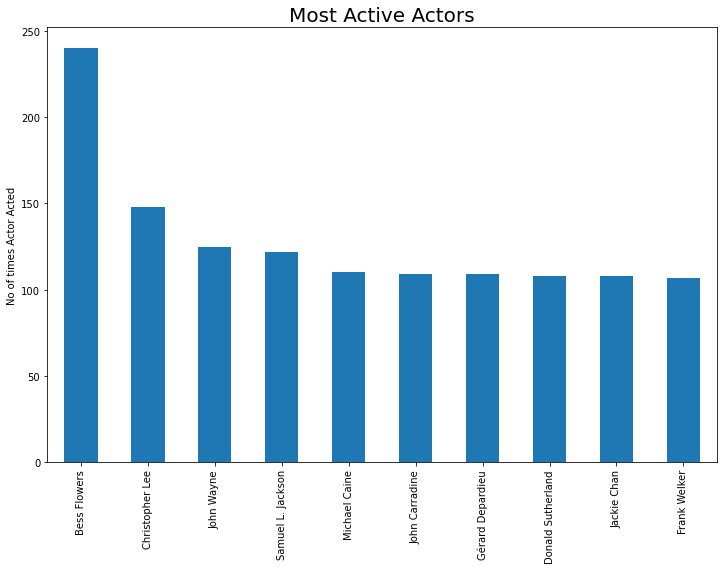

In [278]:
plt.figure(figsize=(12,8))
actor.Actor.value_counts().head(10).plot(kind='bar')
plt.title("Most Active Actors",fontsize=20)
plt.ylabel("No of times Actor Acted")
plt.show()

In [291]:
actor_agg=actor.groupby("Actor").agg(Total_movies=("title","count"),Total_Revenue=("revenue_musd","sum"),
                           Mean_Revenue=("revenue_musd","mean"),Mean_rating=("popularity","mean"),
                           Mean_pop=("vote_average","mean")
                          )

In [292]:
actor_agg.nlargest(20,"Total_Revenue")

,Total_movies,Total_Revenue,Mean_Revenue,Mean_rating,Mean_pop
Actor,,,,,
Stan Lee,48,"19,414.96",647.17,29.94,6.51
Samuel L. Jackson,122,"17,109.62",213.87,11.70,6.27
Warwick Davis,34,"13,256.03",662.80,13.09,6.29
Frank Welker,107,"13,044.15",326.10,9.57,6.31
John Ratzenberger,46,"12,596.13",449.86,10.96,6.48
Jess Harnell,35,"12,234.61",611.73,10.92,6.44
Hugo Weaving,40,"11,027.58",459.48,10.97,6.47
Ian McKellen,44,"11,015.59",478.94,15.45,6.35
Johnny Depp,69,"10,653.76",217.42,12.38,6.44


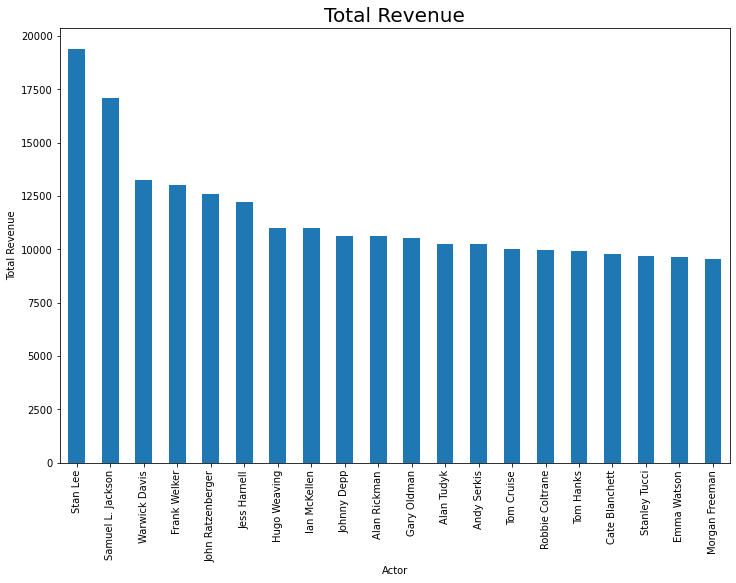

In [295]:
plt.figure(figsize=(12,8))
actor_agg.Total_Revenue.nlargest(20).plot(kind='bar')
plt.title("Total Revenue",fontsize=20)
plt.ylabel("Total Revenue")
plt.show()

## Popular Genre

In [351]:
genre_df=movies["genres"].str.split('|',expand=True).stack().reset_index(level=1,drop=True).to_frame()

In [352]:
genre_df.columns=['genre']

In [353]:
genre_df.head()

,genre
0,Animation
0,Comedy
0,Family
1,Adventure
1,Fantasy


In [354]:
movies.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres', 'belongs_to_collection', 'original_language', 'budget_musd', 'revenue_musd', 'production_companies', 'production_countries', 'vote_count', 'vote_average', 'popularity', 'runtime', 'overview', 'spoken_languages', 'poster_path', 'cast', 'cast_size', 'crew_size', 'director', 'Franchise', 'ROI'], dtype='object')

In [355]:
genre_df=genre_df.merge(movies[["release_date","revenue_musd","vote_average","popularity"]],how="left",left_index=True,right_index=True)

In [356]:
genre_df.head()

,genre,release_date,revenue_musd,vote_average,popularity
0,Animation,1995-10-30,373.55,7.70,21.95
0,Comedy,1995-10-30,373.55,7.70,21.95
0,Family,1995-10-30,373.55,7.70,21.95
1,Adventure,1995-12-15,262.80,6.90,17.02
1,Fantasy,1995-12-15,262.80,6.90,17.02


In [357]:
genre_df['release_date']=genre_df['release_date'].astype("str")

In [358]:
genre_df['release_year']=genre_df['release_date'].str.slice(0,4)

In [359]:
genre_df

,genre,release_date,revenue_musd,vote_average,popularity,release_year
0,Animation,1995-10-30,373.55,7.70,21.95,1995
0,Comedy,1995-10-30,373.55,7.70,21.95,1995
0,Family,1995-10-30,373.55,7.70,21.95,1995
1,Adventure,1995-12-15,262.80,6.90,17.02,1995
1,Fantasy,1995-12-15,262.80,6.90,17.02,1995
...,...,...,...,...,...,...
44688,Action,2003-08-01,nan,3.80,0.90,2003
44688,Drama,2003-08-01,nan,3.80,0.90,2003
44688,Thriller,2003-08-01,nan,3.80,0.90,2003
44689,nan,1917-10-21,nan,nan,0.00,1917


In [423]:
genre_df["period"]=np.where(genre_df.release_year.str.contains("198"),"1980",np.where(genre_df.release_year.str.contains("199"),
                                                                                     "1990",genre_df.release_year))

In [424]:
genre_df

,genre,release_date,revenue_musd,vote_average,popularity,release_year,period
0,Animation,1995-10-30,373.55,7.70,21.95,1995,1990
0,Comedy,1995-10-30,373.55,7.70,21.95,1995,1990
0,Family,1995-10-30,373.55,7.70,21.95,1995,1990
1,Adventure,1995-12-15,262.80,6.90,17.02,1995,1990
1,Fantasy,1995-12-15,262.80,6.90,17.02,1995,1990
...,...,...,...,...,...,...,...
44688,Action,2003-08-01,nan,3.80,0.90,2003,2003
44688,Drama,2003-08-01,nan,3.80,0.90,2003,2003
44688,Thriller,2003-08-01,nan,3.80,0.90,2003,2003
44689,nan,1917-10-21,nan,nan,0.00,1917,1917


In [425]:
genre_df["period"]=genre_df["period"].astype("str")

In [427]:
period_1980_1990=(genre_df.period=="1980") | (genre_df.period=="1990")

In [428]:
genre_df.loc[period_1980_1990,["genre","period","revenue_musd"]]

,genre,period,revenue_musd
535,Science Fiction,1980,33.14
535,Drama,1980,33.14
535,Thriller,1980,33.14
539,History,1980,nan
539,Drama,1980,nan
...,...,...,...
44651,Fantasy,1980,nan
44651,Comedy,1980,nan
44651,Romance,1980,nan
44651,Drama,1980,nan


In [429]:
pd.pivot_table(genre_df.loc[period_1980_1990,
                             ["genre","period","revenue_musd"]],values="revenue_musd",index="genre",columns=["period"],aggfunc=np.sum)

period,1980,1990
genre,,
Action,"11,190.20","1,614.17"
Adventure,"10,678.15","1,762.25"
Animation,"1,033.85",47.43
Comedy,"13,517.07","2,366.84"
Crime,"4,464.45","1,026.63"
Documentary,19.07,4.05
Drama,"10,178.39","2,394.81"
Family,"4,428.11","1,027.00"
Fantasy,"4,411.73",787.34


In [367]:
genre_df.loc[(genre_df.release_year.str.contains("198")) | (genre_df.release_year.str.contains("199")),
                             ["genre","release_year","revenue_musd"]]

,genre,release_year,revenue_musd
0,Animation,1995,373.55
0,Comedy,1995,373.55
0,Family,1995,373.55
1,Adventure,1995,262.80
1,Fantasy,1995,262.80
...,...,...,...
44677,Documentary,1981,nan
44684,Science Fiction,1995,nan
44685,Drama,1991,nan
44685,Action,1991,nan
